In [1]:
import pandas as pd

In [2]:
path="/home/apoorva/Documents/mosfet_nn/md.csv"

In [3]:
data=pd.read_csv(path)
data1=pd.read_csv(path)

In [4]:
data.head()

#data['ids']=data['ids'].abs()
#data1['ids']=data1['ids'].abs()
#data.head()

,sl.no,vgs,vds,ids,w
0,0,0.0,0.0,0.0,0.000006
1,1,0.1,0.0,0.0,0.000006
2,2,0.2,0.0,0.0,0.000006
3,3,0.3,0.0,0.0,0.000006
4,4,0.4,0.0,0.0,0.000006


In [5]:
data1 = data1.sample(frac=1).reset_index(drop=True)
data1.head()


,sl.no,vgs,vds,ids,w
0,745,0.1,2.4,2.410000e-12,1.370000e-05
1,673,2.2,2.1,3.365766e-05,9.200000e-06
2,885,1.7,2.8,3.916803e-06,3.200000e-06
3,759,1.5,2.4,3.100024e-07,2.000000e-07
4,698,1.6,2.2,3.690522e-07,2.000000e-07


In [6]:
inp=data1.as_matrix(columns={'vgs','vds','ids'})
print (inp)
print (inp.shape)

[[  2.40000000e+00   2.41000000e-12   1.00000000e-01]
 [  2.10000000e+00   3.36576600e-05   2.20000000e+00]
 [  2.80000000e+00   3.91680300e-06   1.70000000e+00]
 ..., 
 [  2.80000000e+00   5.88800000e-05   2.50000000e+00]
 [  2.60000000e+00   1.30410300e-06   8.00000000e-01]
 [  3.00000000e-01   9.84937800e-07   1.40000000e+00]]
(11532, 3)


In [7]:
out=data1['w'].as_matrix()
out=out.reshape(11532,1)
print(out.shape)

(11532, 1)


In [8]:
inp_train=inp[0:10571]
out_train=out[0:10571]
train_size=inp_train.shape[0]
print (train_size)

10571


In [52]:
inp_test=inp[10571:]
out_test=out[10571:]
ids=data1['ids'].as_matrix()
ids=ids[10571:]
print (ids)
test_size=inp_test.shape
print (test_size)

[  5.77227800e-05   1.11000000e-12   1.63200200e-07   1.22572100e-05
   8.17960200e-06   4.10000000e-13   6.99166800e-05   1.56646900e-05
   7.60437500e-05   3.52792100e-05   2.81000000e-12   1.35252000e-05
   2.01300000e-05   1.81258000e-05   0.00000000e+00   2.41110100e-06
   1.89000100e-06   2.01000000e-12   1.26000300e-06   8.04333900e-06
   2.57468800e-06   1.42101600e-07   1.76800000e-06   1.21000000e-12
   1.29591000e-05   7.50302300e-07   1.01000000e-12   6.07200000e-05
   1.30005000e-05   1.57300300e-06   3.09992400e-05   9.24078800e-06
   2.71000000e-12   1.08002000e-07   3.10000000e-13   2.66371900e-05
   7.68002000e-07   1.51000000e-12   9.10000000e-13   1.91000000e-12
   5.56400400e-07   2.87980100e-06   2.73962500e-06   4.05467000e-05
   5.83312700e-06   5.59406400e-06   5.06760000e-06   3.34434400e-05
   1.81000000e-12   1.39876000e-05   0.00000000e+00   2.10000000e-13
   3.78127500e-07   1.10687500e-05   1.58700000e-05   5.00503000e-07
   4.22625100e-06   2.04018800e-05

In [53]:
import tensorflow as tf

In [11]:

batch_size=961
iteration=1000

In [12]:
hid1=3
hid2=3

In [13]:
inp_size=3
out_size=1

In [14]:
X=tf.placeholder('float',(batch_size,inp_size))
Y=tf.placeholder('float',(batch_size,out_size))

In [15]:
X1=tf.placeholder('float',(batch_size,inp_size))
Y1=tf.placeholder('float',(batch_size,out_size))

In [16]:
w1=tf.Variable(tf.random_normal([inp_size,hid1],1))
w2=tf.Variable(tf.random_normal([hid1,hid2],1))
w3=tf.Variable(tf.random_normal([hid2,out_size],1))

In [17]:
b1=tf.Variable(tf.random_normal([batch_size,hid1],1))
b2=tf.Variable(tf.random_normal([batch_size,hid2],1))
b3=tf.Variable(tf.random_normal([batch_size,out_size],1))

In [18]:
def perceptron(x):
    y1=tf.add(tf.matmul(x,w1),b1)
    y2=tf.add(tf.matmul(y1,w2),b2)
    y3=tf.add(tf.matmul(y2,w3),b3)
    return y3

In [19]:
pred=perceptron(X)
predt=perceptron(X1)

In [21]:
loss=tf.reduce_sum(tf.pow((pred-Y),2))/2*batch_size

In [20]:
'''p=tf.argmax(predt, 1)
o= tf.argmax(out_test, 1)

correct_preds = tf.equal(p,o)
accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))'''

'p=tf.argmax(predt, 1)\no= tf.argmax(out_test, 1)\n\ncorrect_preds = tf.equal(p,o)\naccuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))'

In [23]:
optim=tf.train.AdamOptimizer(0.01)
mini=optim.minimize(loss)

In [22]:
'''batch = tf.Variable(0)

alpha = tf.train.exponential_decay(
  1.0,                # Base learning rate.dd
  batch,  # Current index into the dataset.
  train_size,          # Decay step.
  0.25,                # Decay rate.
  staircase=True)'''


'batch = tf.Variable(0)\n\nalpha = tf.train.exponential_decay(\n  1.0,                # Base learning rate.\n  batch,  # Current index into the dataset.\n  train_size,          # Decay step.\n  0.25,                # Decay rate.\n  staircase=True)'

In [24]:
def Trainbatch(i,batch_size,inp,out):
    #print (i)
    a=(i-1)*batch_size
    #print (a)
    b =(i*batch_size)
    #print(b)
    x=tf.zeros([batch_size,3])
    y=tf.zeros([batch_size,1])
    x=inp[a:b]
    #print (x.shape)
    y=out[a:b]
    #print (y.shape)
    return x,y

In [25]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for j in range(iteration):
    for i in range(1,12):
        batchx,batchy=Trainbatch(i,batch_size,inp_train,out_train)
        _,l,p=sess.run([mini,loss,pred],feed_dict={X:batchx,Y:batchy})
    print (j,l)

    
        

0 9.55558e+08
1 5.69343e+08
2 3.5415e+08
3 2.29004e+08
4 1.51413e+08
5 1.00574e+08
6 6.61056e+07
7 4.25664e+07
8 2.68365e+07
9 1.6831e+07
10 1.09024e+07
11 7.64977e+06
12 5.94863e+06
13 5.02217e+06
14 4.43014e+06
15 3.97305e+06
16 3.57965e+06
17 3.22939e+06
18 2.916e+06
19 2.63577e+06
20 2.38523e+06
21 2.16118e+06
22 1.96073e+06
23 1.78137e+06
24 1.62083e+06
25 1.4771e+06
26 1.34838e+06
27 1.23305e+06
28 1.12968e+06
29 1.03698e+06
30 953806.0
31 879137.0
32 812061.0
33 751764.0
34 697521.0
35 648683.0
36 604671.0
37 564970.0
38 529118.0
39 496703.0
40 467357.0
41 440752.0
42 416596.0
43 394626.0
44 374609.0
45 356338.0
46 339626.0
47 324307.0
48 310233.0
49 297274.0
50 285311.0
51 274240.0
52 263967.0
53 254410.0
54 245494.0
55 237155.0
56 229333.0
57 221976.0
58 215039.0
59 208479.0
60 202262.0
61 196353.0
62 190726.0
63 185353.0
64 180213.0
65 175285.0
66 170552.0
67 165997.0
68 161608.0
69 157370.0
70 153273.0
71 149308.0
72 145465.0
73 141738.0
74 138118.0
75 134599.0
76 131177.0
7

601 1.70757e-05
602 1.70672e-05
603 1.69896e-05
604 1.71022e-05
605 1.69163e-05
606 1.69498e-05
607 1.70435e-05
608 1.68846e-05
609 1.69441e-05
610 1.70298e-05
611 1.68457e-05
612 1.70252e-05
613 1.69622e-05
614 1.68512e-05
615 1.68802e-05
616 1.7045e-05
617 1.6984e-05
618 1.71254e-05
619 1.70143e-05
620 1.69185e-05
621 1.7035e-05
622 1.70439e-05
623 1.70231e-05
624 1.70283e-05
625 1.7035e-05
626 1.70113e-05
627 1.70752e-05
628 1.70071e-05
629 1.71172e-05
630 1.70902e-05
631 1.70303e-05
632 1.70575e-05
633 1.70551e-05
634 1.69529e-05
635 1.71964e-05
636 1.71156e-05
637 1.7129e-05
638 1.71653e-05
639 1.71498e-05
640 1.73695e-05
641 1.72825e-05
642 1.72588e-05
643 1.72316e-05
644 1.73414e-05
645 1.73625e-05
646 1.72977e-05
647 1.72291e-05
648 1.71114e-05
649 1.72701e-05
650 1.71793e-05
651 1.73179e-05
652 1.71084e-05
653 1.71654e-05
654 1.72532e-05
655 1.71412e-05
656 1.71652e-05
657 1.71582e-05
658 1.72614e-05
659 1.71871e-05
660 1.70524e-05
661 1.72134e-05
662 1.69982e-05
663 1.71216e-

In [45]:
import matplotlib.pyplot as plt
import matplotlib

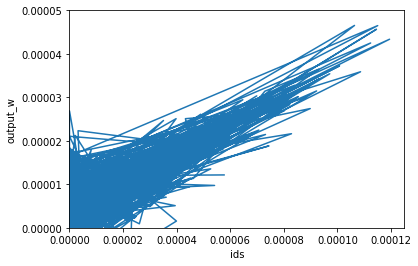

In [73]:
axes = plt.gca()
axes.set_xlim([0.00,0.000125])
axes.set_ylim([0.0000,0.00005])
#axes.set_xlim([0,0.0000001])
#axes.set_ylim([0.00001,0.0000001])
plt.plot(ids,predt)
plt.xlabel('ids')
plt.ylabel('output_w')
plt.show()

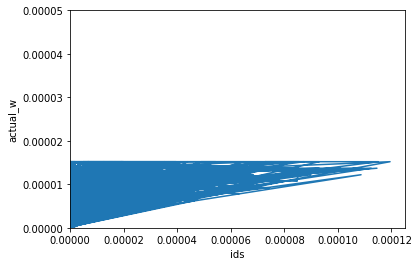

In [74]:
axes = plt.gca()
axes.set_xlim([0.00,0.000125])
axes.set_ylim([0.0000,0.00005])
#axes.set_xlim([0,0.0000001])
#axes.set_ylim([0.00001,0.0000001])
plt.plot(ids,out_test)
plt.xlabel('ids')
plt.ylabel('actual_w')
plt.show()